In [1]:
import numpy as np
import pandas as pd
import awkward
import uproot

import matplotlib.pyplot as plt

In [6]:
%pip install uproot
%pip install awkward-pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
file = uproot.open("/global/cfs/cdirs/atlas/gottino/Charm/Analysis/run_batch_tmp/CharmAnalysis.SingleParticleGun.1.ForcedDecay.LambdaC.tree.merge.default.loosecuts.root")

In [3]:
key_list = []

#DMesons_pt, eta, phi
for i in range(12, 16):
    key_list.append(file["CharmAnalysis;1"].keys()[i])
    
#DMesons_daughterInfo__pt, eta, phi
for i in range(46, 49):
    key_list.append(file["CharmAnalysis;1"].keys()[i])

print("Keys: ", key_list)
print("List of Key Files: ", file.keys())

Keys:  ['DMesons_pt', 'DMesons_m', 'DMesons_eta', 'DMesons_phi', 'DMesons_daughterInfo__pt', 'DMesons_daughterInfo__eta', 'DMesons_daughterInfo__phi']
List of Key Files:  ['cutflow;1', 'track_cflow;1', 'tight_track_cflow;1', 'CharmAnalysis;1']


In [4]:
#print("List of Key Files: ", file["CharmAnalysis;1"].keys())
file["CharmAnalysis;1"].keys()

['EventInfo_eventNumber',
 'EventInfo_RandomRunNumber',
 'CharmEventInfo_TopWeight',
 'CharmEventInfo_PV_X',
 'CharmEventInfo_PV_Y',
 'CharmEventInfo_PV_Z',
 'CharmEventInfo_beamPosX',
 'CharmEventInfo_beamPosY',
 'CharmEventInfo_beamPosZ',
 'CharmEventInfo_beamPosSigmaX',
 'CharmEventInfo_beamPosSigmaY',
 'CharmEventInfo_beamPosSigmaZ',
 'DMesons_pt',
 'DMesons_m',
 'DMesons_eta',
 'DMesons_phi',
 'DMesons_pdgId',
 'DMesons_ptcone40',
 'DMesons_D0Index',
 'DMesons_DeltaMass',
 'DMesons_SlowPionD0',
 'DMesons_SlowPionZ0SinTheta',
 'DMesons_decayType',
 'DMesons_truthBarcode',
 'DMesons_fitOutput__Impact',
 'DMesons_fitOutput__ImpactError',
 'DMesons_fitOutput__ImpactZ0',
 'DMesons_fitOutput__ImpactZ0Error',
 'DMesons_fitOutput__ImpactTheta',
 'DMesons_fitOutput__ImpactZ0SinTheta',
 'DMesons_fitOutput__ImpactSignificance',
 'DMesons_fitOutput__Charge',
 'DMesons_fitOutput__Lxy',
 'DMesons_fitOutput__LxyErr',
 'DMesons_fitOutput__Chi2',
 'DMesons_costhetastar',
 'DMesons_mKpi1',
 'DMeson

In [5]:
tree = file["CharmAnalysis;1"]

#with dictionary comprehension
#data = {key: tree[key].array(library="np") for key in key_list}

#without dictionary comprehension"

data = {}
for key in key_list:
    data[key] = tree[key].array(library="np")
    
df = pd.DataFrame(data)

df

,DMesons_pt,DMesons_m,DMesons_eta,DMesons_phi,DMesons_daughterInfo__pt,DMesons_daughterInfo__eta,DMesons_daughterInfo__phi
0,[],[],[],[],(),(),()
1,"[12935.843, 12935.843]","[1973.065, 2275.632]","[-0.43086535, -0.43086535]","[-0.75572276, -0.75572276]","((2668.6013, 8755.429, 1605.7126), (8755.429, ...","((-0.39151618, -0.42617038, -0.49625993), (-0....","((-0.54977494, -0.8351837, -0.66391087), (-0.8..."
2,[],[],[],[],(),(),()
3,"[15837.362, 15837.362, 15837.362]","[1778.423, 2277.83, 2369.549]","[-1.9853406, -1.9853406, -1.9853406]","[-2.1627724, -2.1627724, -2.1627724]","((3267.9485, 6491.757, 6113.284), (6491.757, 3...","((-2.0707278, -2.0230656, -1.8890115), (-2.023...","((-2.2039685, -2.1058285, -2.201573), (-2.1058..."
4,[],[],[],[],(),(),()
...,...,...,...,...,...,...,...
999995,[],[],[],[],(),(),()
999996,"[10990.987, 10990.987]","[1809.0774, 2290.5708]","[0.39566922, 0.39566922]","[-0.74787265, -0.74787265]","((3995.6099, 2354.6182, 4726.4443), (4725.8438...","((0.39959043, 0.26629156, 0.4480946), (0.44810...","((-0.6143594, -0.6940383, -0.8877019), (-0.887..."
999997,[],[],[],[],(),(),()
999998,"[37313.227, 37313.227]","[1768.9451, 2308.049]","[-1.1318593, -1.1318593]","[-0.20700808, -0.20700808]","((21280.752, 14568.637, 1466.8083), (14568.637...","((-1.140685, -1.1358639, -0.94994193), (-1.135...","((-0.21705762, -0.19296812, -0.2000686), (-0.1..."


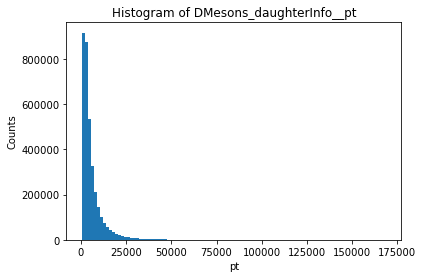

In [40]:
values = []
for i in df["DMesons_daughterInfo__pt"]:
    if len(i) > 0:
        for sublist in i:
            for j in sublist:
                values.append(j)

plt.hist(values, bins=100)
plt.xlabel("pt")
plt.ylabel("Counts")
plt.title("Histogram of DMesons_daughterInfo__pt")
plt.show()

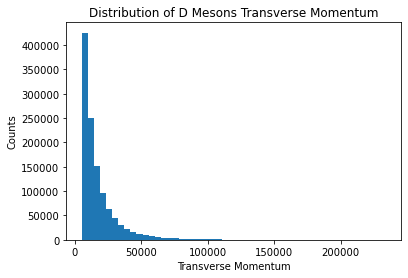

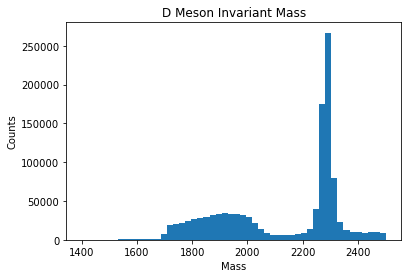

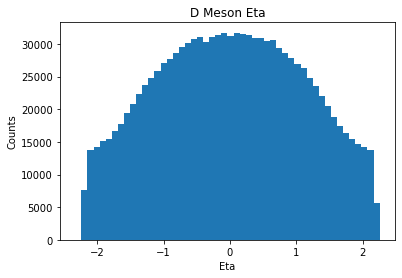

In [27]:
plt.hist(df['DMesons_pt'].explode(), bins=50)
plt.title('Distribution of D Mesons Transverse Momentum')
plt.xlabel('Transverse Momentum')
plt.ylabel('Counts')
plt.show()

plt.hist(df['DMesons_m'].explode(), bins=50)
plt.title("D Meson Invariant Mass")
plt.xlabel('Mass')
plt.ylabel('Counts')
plt.show()

plt.hist(df['DMesons_eta'].explode(), bins=50)
plt.title("D Meson Eta")
plt.xlabel('Eta')
plt.ylabel('Counts')
plt.show()

Text(0.5, 1.0, 'DMesons_pt vs. DMesons_eta')

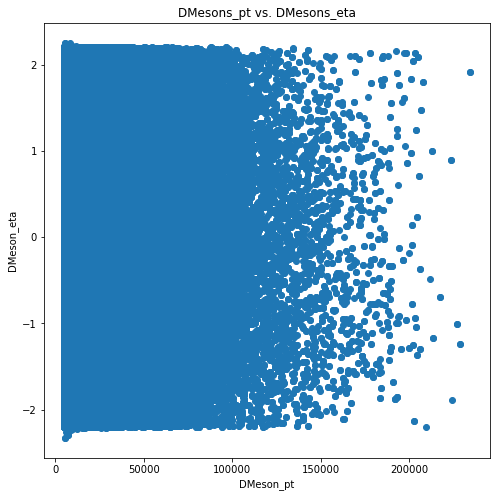

In [28]:
plt.figure(figsize=(8, 8))
plt.scatter(df["DMesons_pt"].explode(), df["DMesons_eta"].explode())
plt.xlabel("DMeson_pt")
plt.ylabel("DMeson_eta")
plt.title("DMesons_pt vs. DMesons_eta")


Text(0.5, 1.0, 'DMesons_pt vs. DMesons_m')

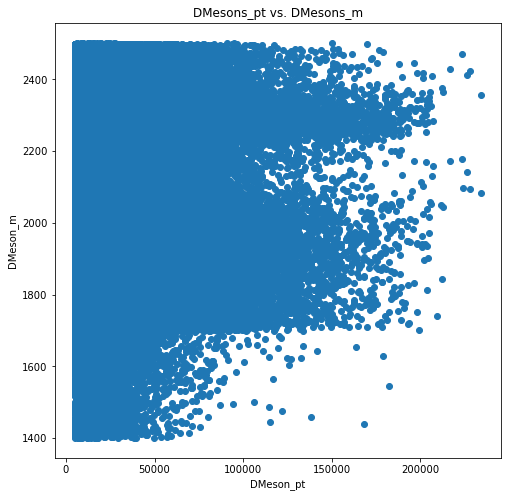

In [15]:
plt.figure(figsize=(8, 8))
plt.scatter(df["DMesons_pt"].explode(), df["DMesons_m"].explode())
plt.xlabel("DMeson_pt")
plt.ylabel("DMeson_m")
plt.title("DMesons_pt vs. DMesons_m")